### 1.浏览器访问题目  
- 打开[猿人学题表](https://match.yuanrenxue.com/list)  
- 打开开发者工具(F12)
    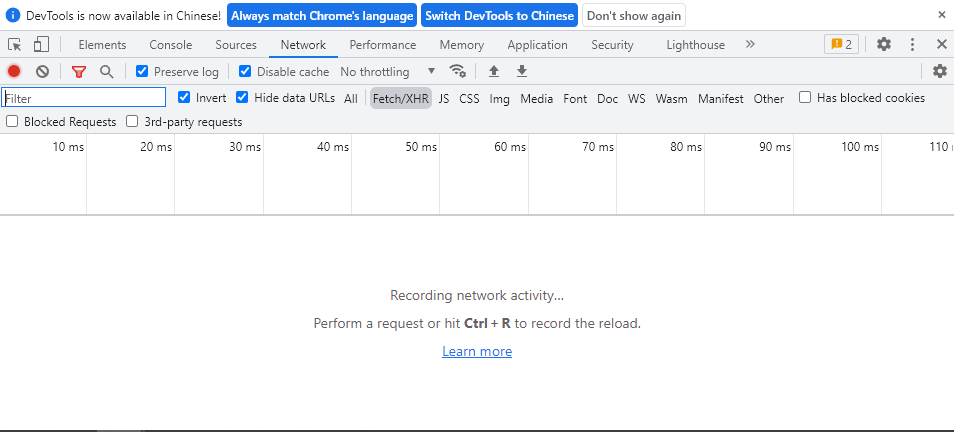
- 点击第一题
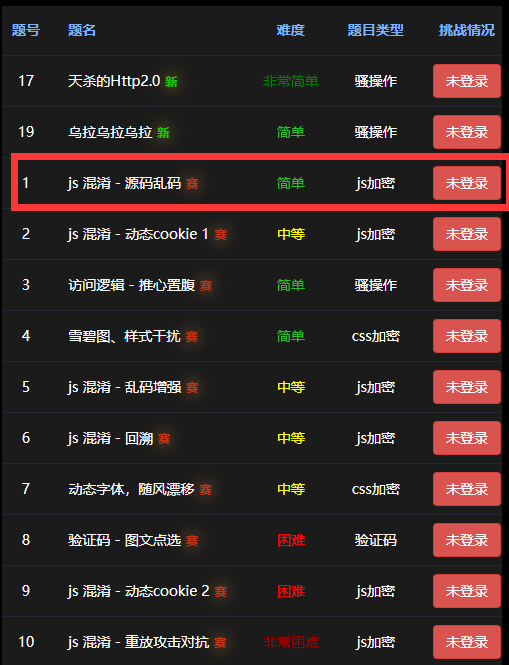

### 2.尝试分析解决步骤
- 浏览题目
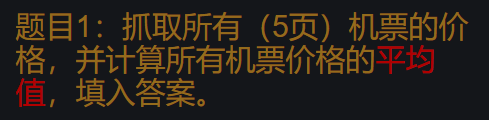
- 梳理思路
    1. Python请求链接（需要传入参数）
    2. 拿到五页的价格并计算平均值
    3. 提交答案

### 3.尝试解决步骤1请求链接
- 解决断点问题
> 如果访问第一题会被js中的断点拦截下来，此时按Ctrl+F8让所有断点经过，然后F5刷新页面
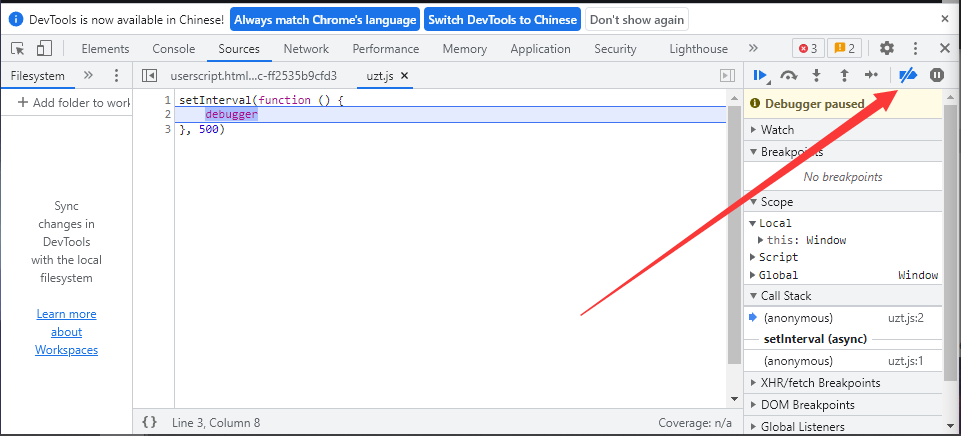
- 找到发送请求
> 在network请求拦截中看到GET方式请求了URL，参数是m，并且返回的有价格列表
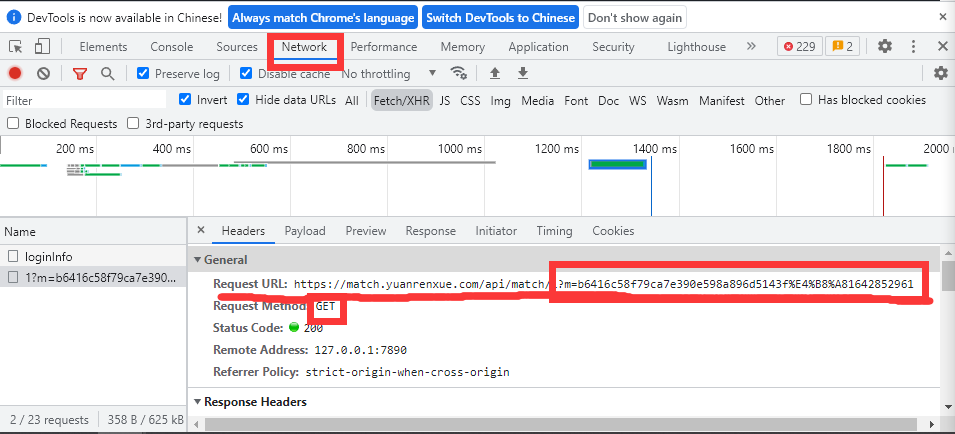
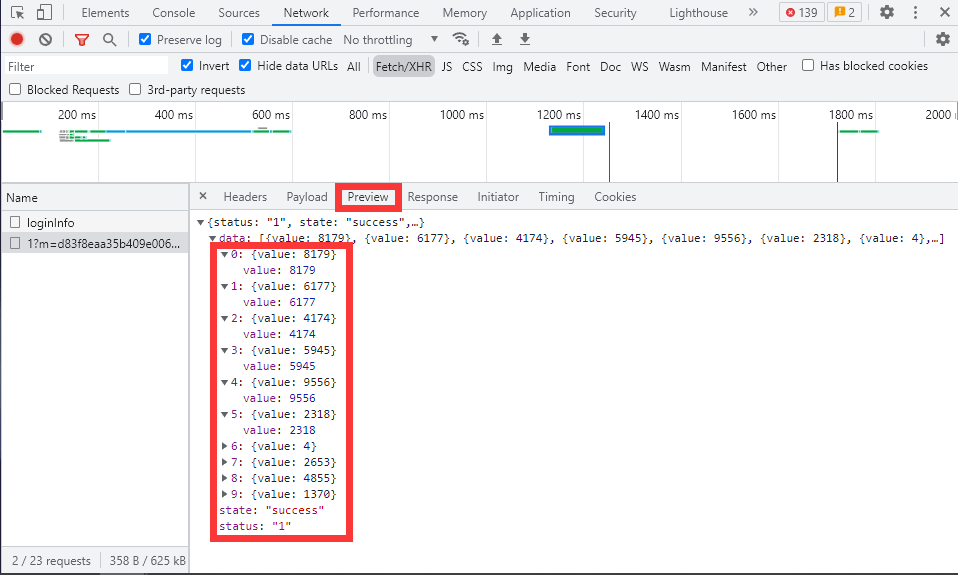
> 切换到payload查看传入的参数格式
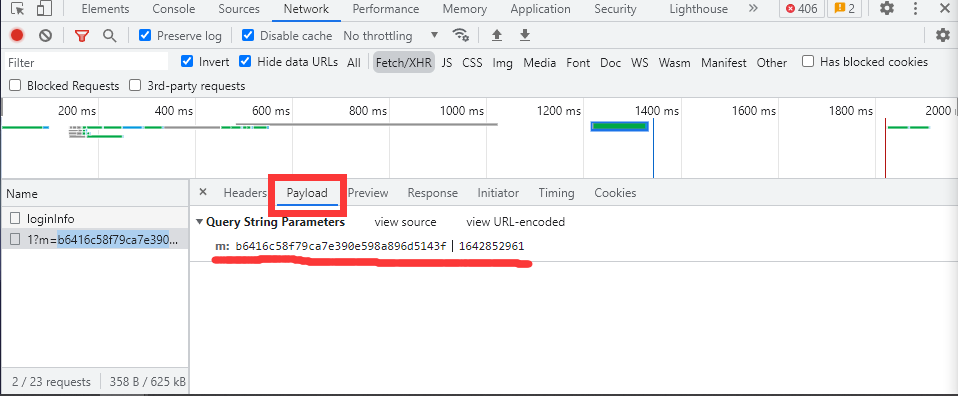
> 可以看到m的参数是经过加密的

### 3.1寻找加密过程
- 寻找入口
> 点击initiator，可以看到调用了五个堆栈，我们点击第一个进入文件
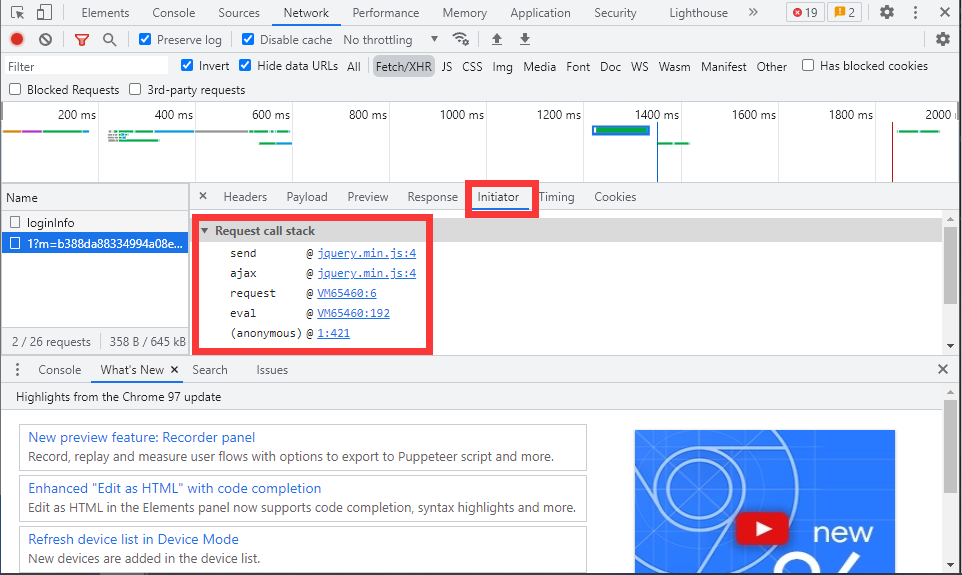
> 可以看到源文件，点击格式化代码
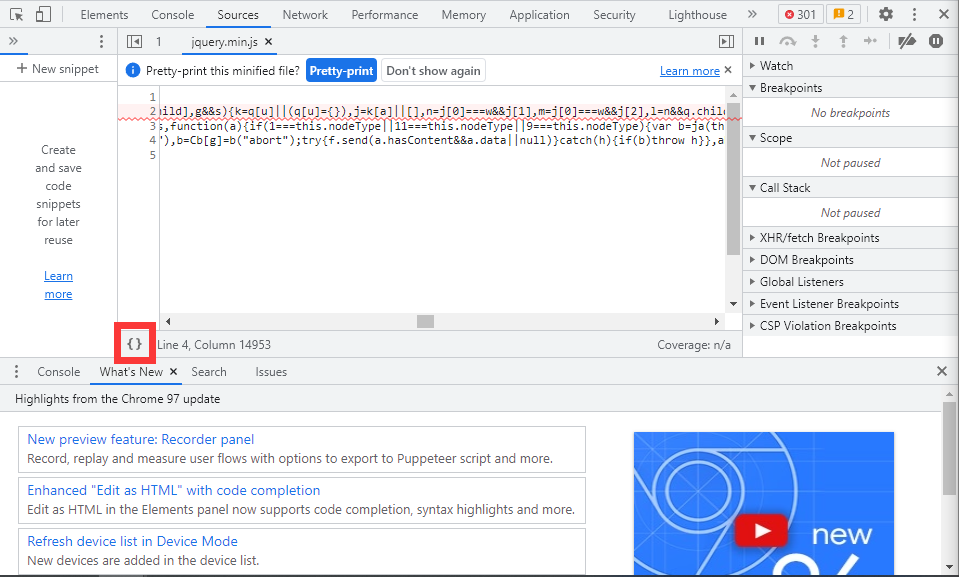
> 再点击左边的序号，在此处下一个断点，然后刷新页面
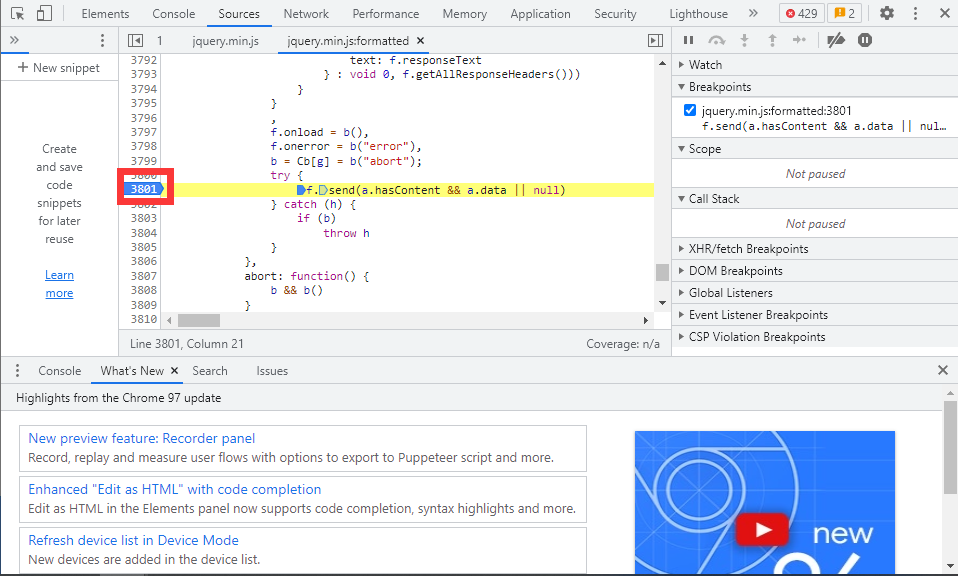
- 寻找加密位置
> 程序会被断下，由于第一次抓的包不是我们想要的（只调用了三个堆栈不是之前看到的五个），按下F8继续拦截下一个
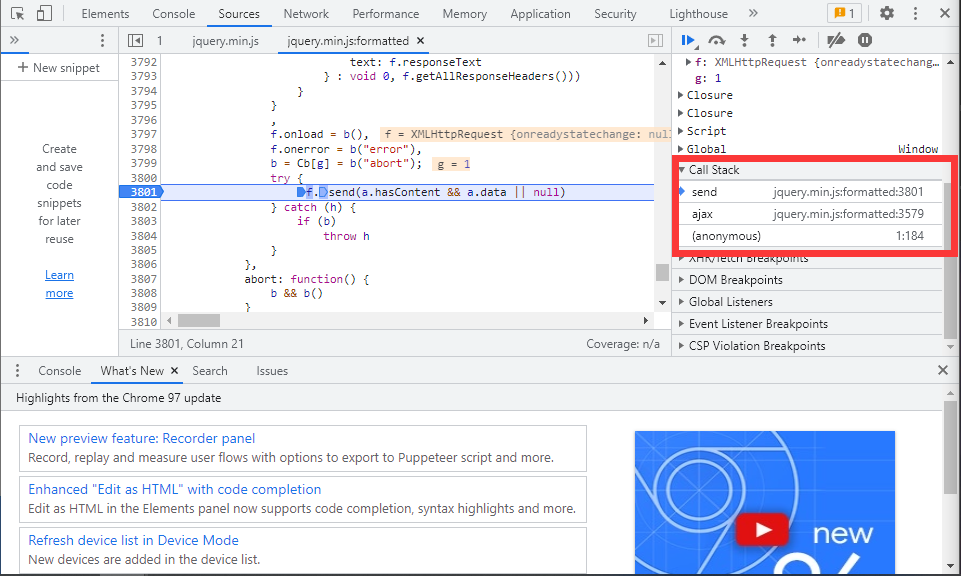
> 由此可看到拦截的包有五个堆栈，对应之前看到的，但是变量列表里没有我们想要的变量，我们查看上一个堆栈
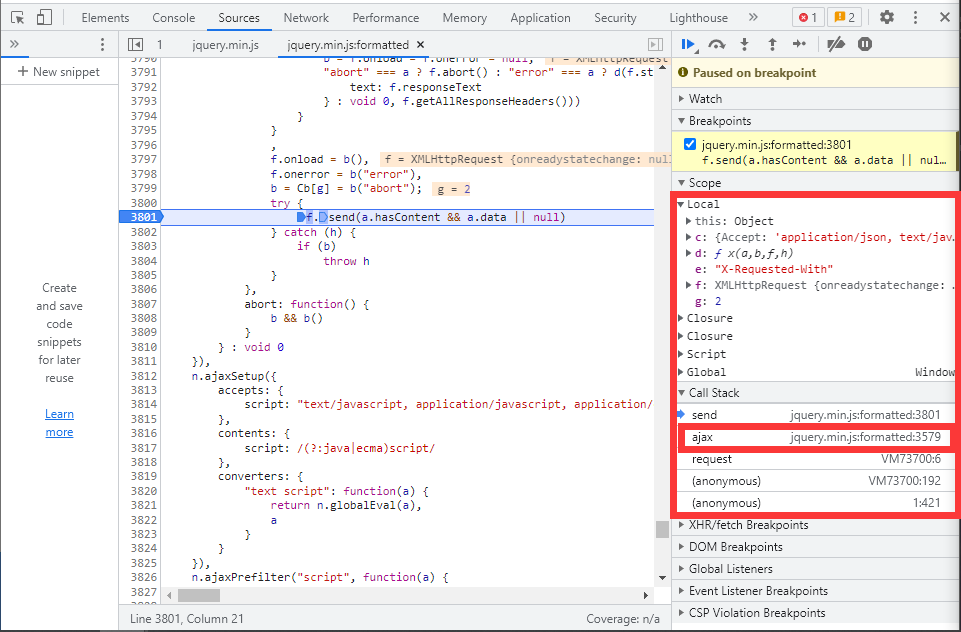
> 找到了我们想要的m变量的值，我们确定拦截了正确的包 
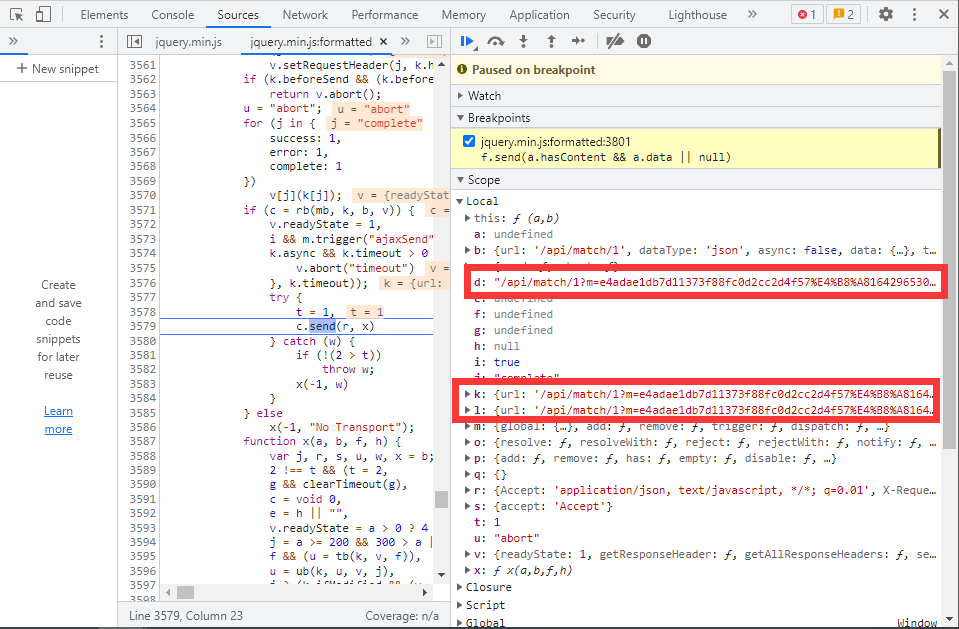
> 继续往上查看堆栈，找到(anonymous）时，发现要找的变量不见了，由此判断加密过程一定是在下一个堆栈中，即request,我们点击定位下
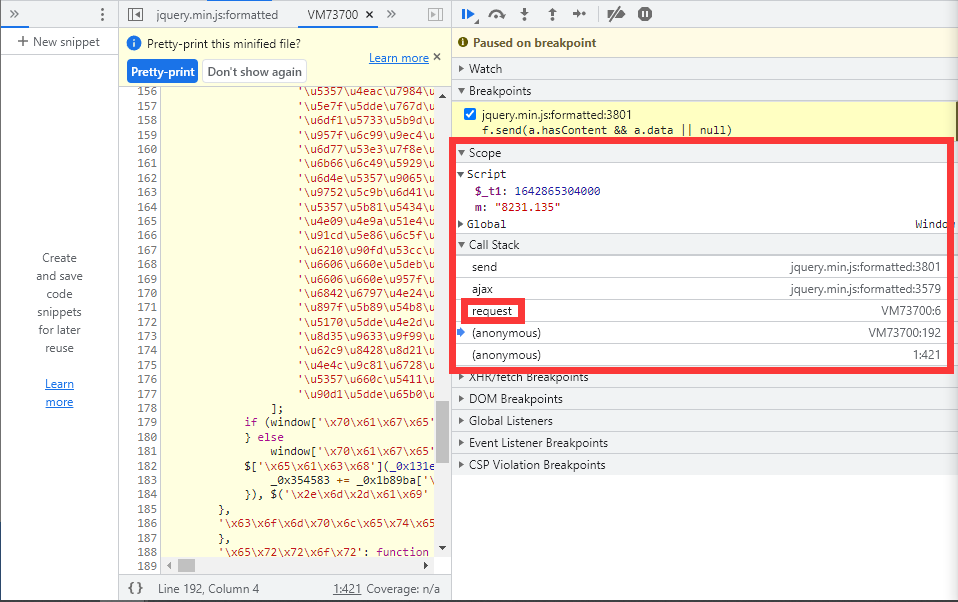

### 3.2解析加密过程
- 格式化代码
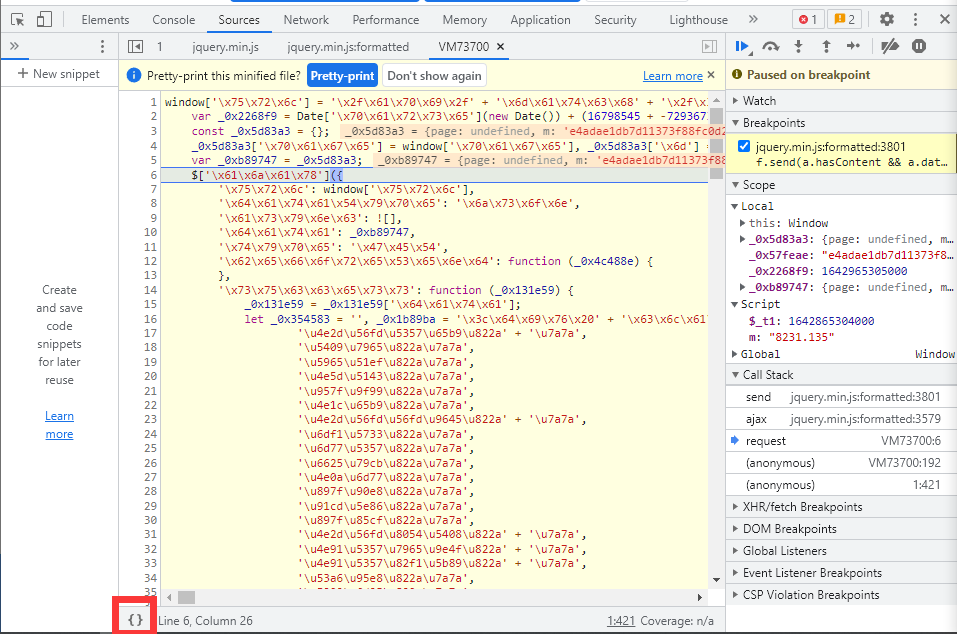
- 分析代码
> 发现主要在代码前几行实现赋值，单拧出来分析
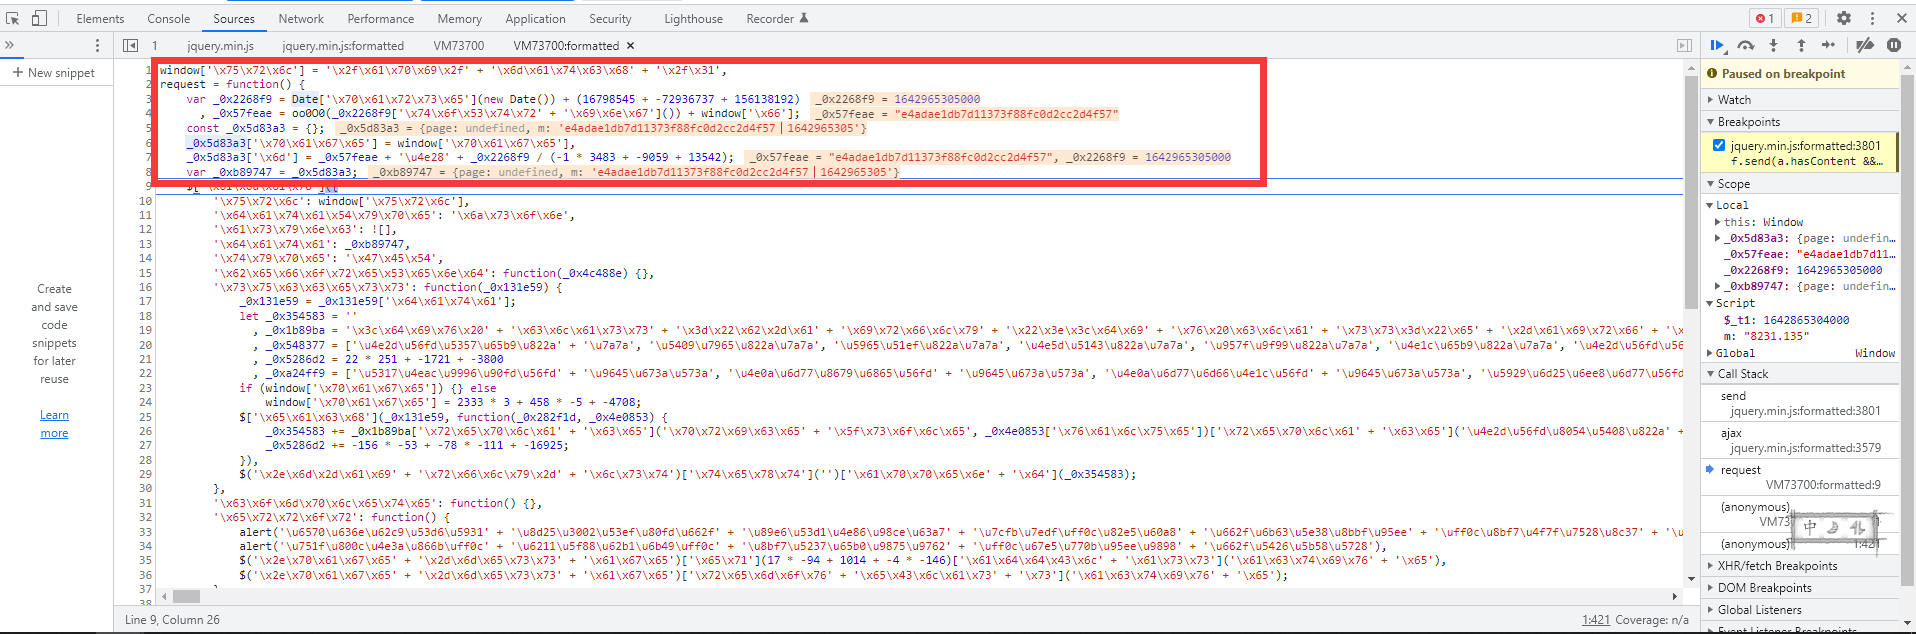


```javascript
window['\x75\x72\x6c'] = '\x2f\x61\x70\x69\x2f' + '\x6d\x61\x74\x63\x68' + '\x2f\x31',
request = function() {
    var _0x2268f9 = Date['\x70\x61\x72\x73\x65'](new Date()) + (16798545 + -72936737 + 156138192)
      , _0x57feae = oo0O0(_0x2268f9['\x74\x6f\x53\x74\x72' + '\x69\x6e\x67']()) + window['\x66'];
    const _0x5d83a3 = {};
    _0x5d83a3['\x70\x61\x67\x65'] = window['\x70\x61\x67\x65'],
    _0x5d83a3['\x6d'] = _0x57feae + '\u4e28' + _0x2268f9 / (-1 * 3483 + -9059 + 13542);
    var _0xb89747 = _0x5d83a3;
```

> 发现_0x2268f9变量值是参数m后半部分的乘以1000的值，等于获取时间戳+100000000
> 发现_0x57feae调用函数oo0O0，传递了_0x2268f9的时间戳和全局变量window['\x66']，（这里使用了16禁止命名法，'\x66'=f），且window[f]正是参数m前半部分的值
> 分析m值为：windos[f] + 中文竖线丨 + 时间戳/1000

- 跟踪代码
> 跟进oo0o0函数，鼠标指向后在弹框中点击
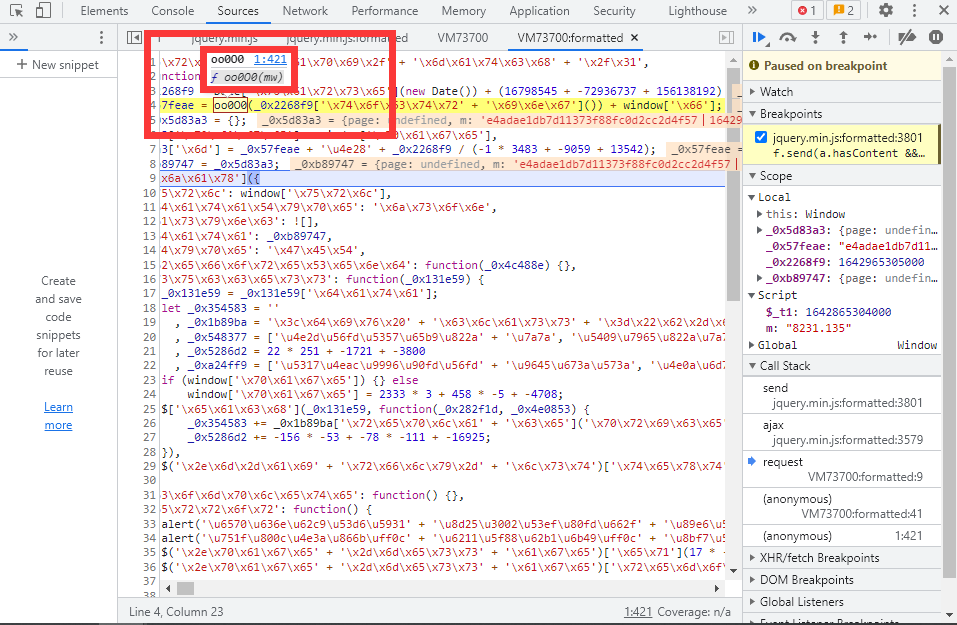
> 跟进之后无法格式化，复制最后一行的代码进入[js在线格式化工具](https://tool.chinaz.com/tools/jsformat.aspx)，粘贴后点击格式化
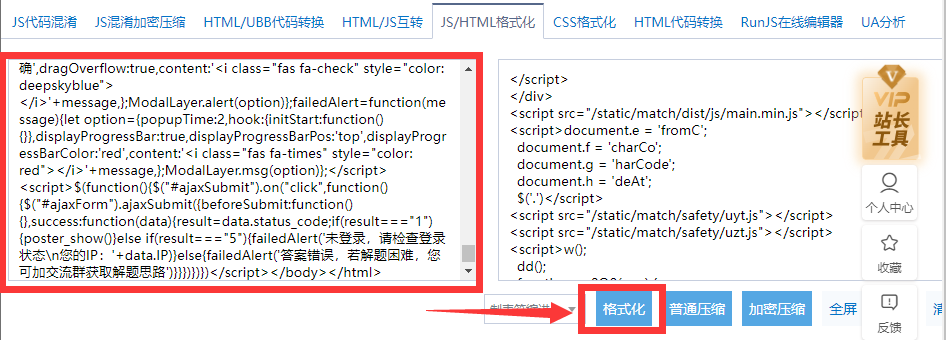
> 找到oo0o0函数定义位置，删除前面和后面无用的代码


```javascript
function oo0O0(mw) {
  window.b = '';
  for (var i = 0,
  len = window.a.length; i < len; i++) {
    console.log(window.a[i]);
    window.b += String[document.e + document.g](window.a[i][document.f + document.h]() - i - window.c)
  }
  var U = ['W5r5W6VdIHZcT8kU', 'WQ8CWRaxWQirAW=='];
  var J = function(o, E) {
    o = o - 0x0;
    var N = U[o];
    if (J['bSSGte'] === undefined) {
      var Y = function(w) {
        var m = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789+/=',
        T = String(w)['replace'](/=+$/, '');
        var A = '';
        for (var C = 0x0,
        b, W, l = 0x0; W = T['charAt'](l++);~W && (b = C % 0x4 ? b * 0x40 + W: W, C++%0x4) ? A += String['fromCharCode'](0xff & b >> ( - 0x2 * C & 0x6)) : 0x0) {
          W = m['indexOf'](W)
        }
        return A
      };
      var t = function(w, m) {
        var T = [],
        A = 0x0,
        C,
        b = '',
        W = '';
        w = Y(w);
        for (var R = 0x0,
        v = w['length']; R < v; R++) {
          W += '%' + ('00' + w['charCodeAt'](R)['toString'](0x10))['slice']( - 0x2)
        }
        w = decodeURIComponent(W);
        var l;
        for (l = 0x0; l < 0x100; l++) {
          T[l] = l
        }
        for (l = 0x0; l < 0x100; l++) {
          A = (A + T[l] + m['charCodeAt'](l % m['length'])) % 0x100,
          C = T[l],
          T[l] = T[A],
          T[A] = C
        }
        l = 0x0,
        A = 0x0;
        for (var L = 0x0; L < w['length']; L++) {
          l = (l + 0x1) % 0x100,
          A = (A + T[l]) % 0x100,
          C = T[l],
          T[l] = T[A],
          T[A] = C,
          b += String['fromCharCode'](w['charCodeAt'](L) ^ T[(T[l] + T[A]) % 0x100])
        }
        return b
      };
      J['luAabU'] = t,
      J['qlVPZg'] = {},
      J['bSSGte'] = !![]
    }
    var H = J['qlVPZg'][o];
    return H === undefined ? (J['TUDBIJ'] === undefined && (J['TUDBIJ'] = !![]), N = J['luAabU'](N, E), J['qlVPZg'][o] = N) : N = H,
    N
  };
  eval(atob(window['b'])[J('0x0', ']dQW')](J('0x1', 'GTu!'), '\x27' + mw + '\x27'));
  return ''
}
```

### 3.3解析跟踪的代码
- 分析代码
> 发现最后返回空，和预想的一致
> 倒数第二行有调用解密函数atob，需要逆向window['b']，和它的参数
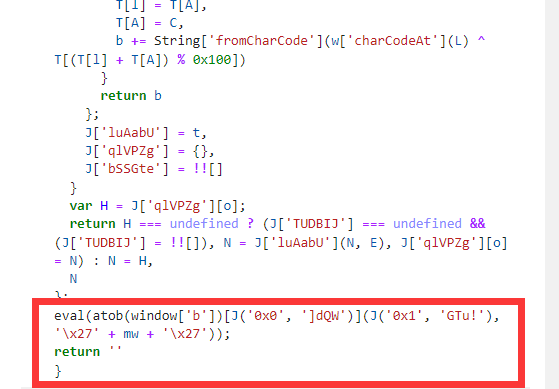
> 手动在Console执行atob(window['b'])得到一段js代码
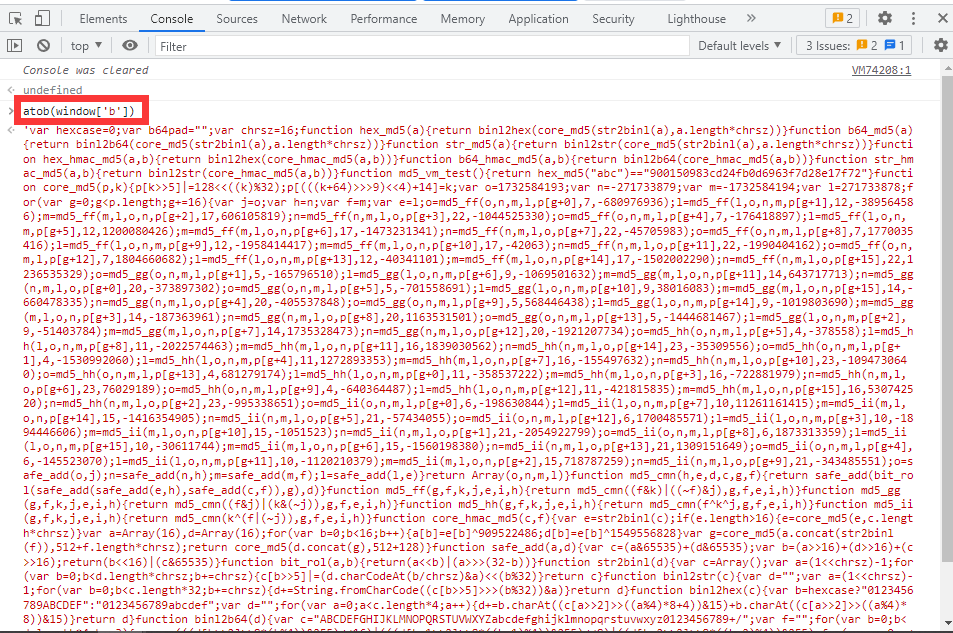
> 复制解析到的js代码并在[js在线格式化工具](https://tool.chinaz.com/tools/jsformat.aspx)中删除前后单引号并格式化
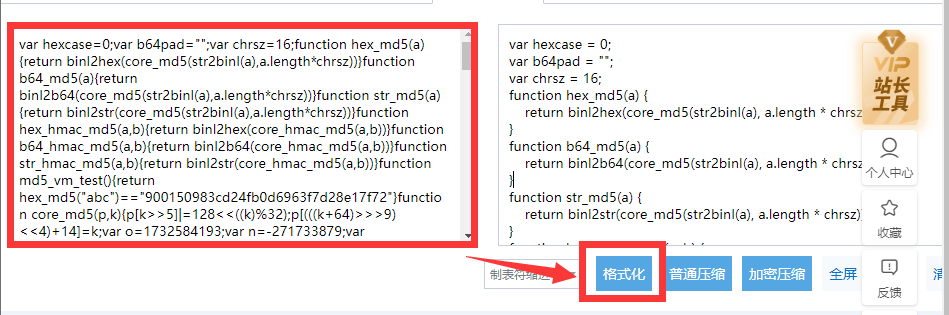
> 此时发现代码为md5加密方式，且在代码最后赋予了全局变量f的值，f的值为m参数的前半部分,赋值调用hex_md5方式加密，传递的参数是[J('0x0', ']dQW')](J('0x1', 'GTu!'), '\x27' + mw + '\x27')
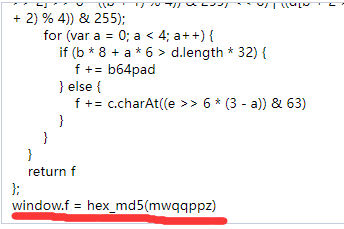
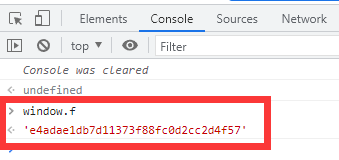
- 逆向代码
> 为了查看传递的参数值，添加JS代码
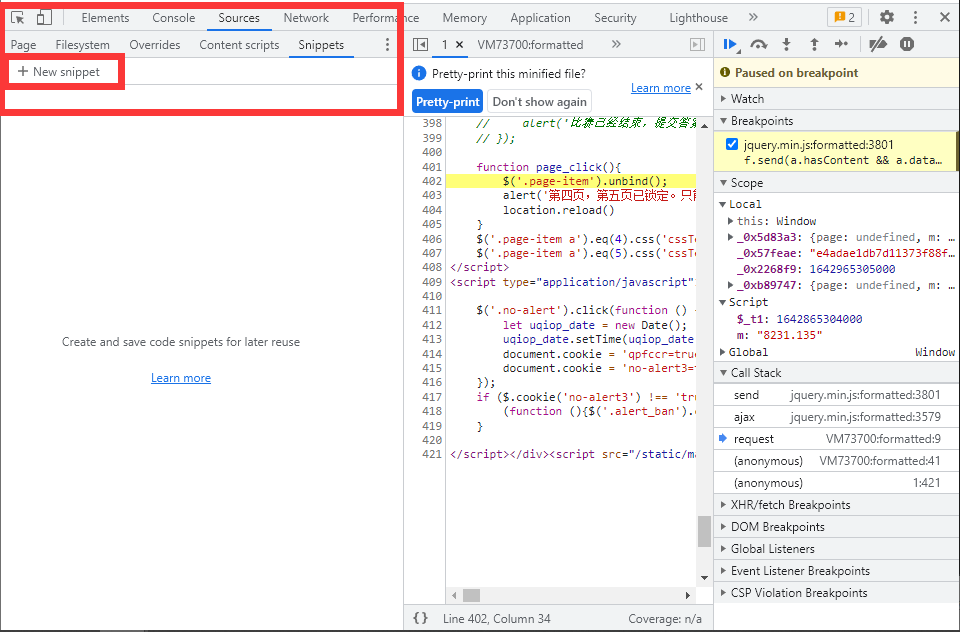
> 粘贴上面的js代码，Ctrl+S保存并在atob处下断点，之后刷新网页，右键这个文件点击run
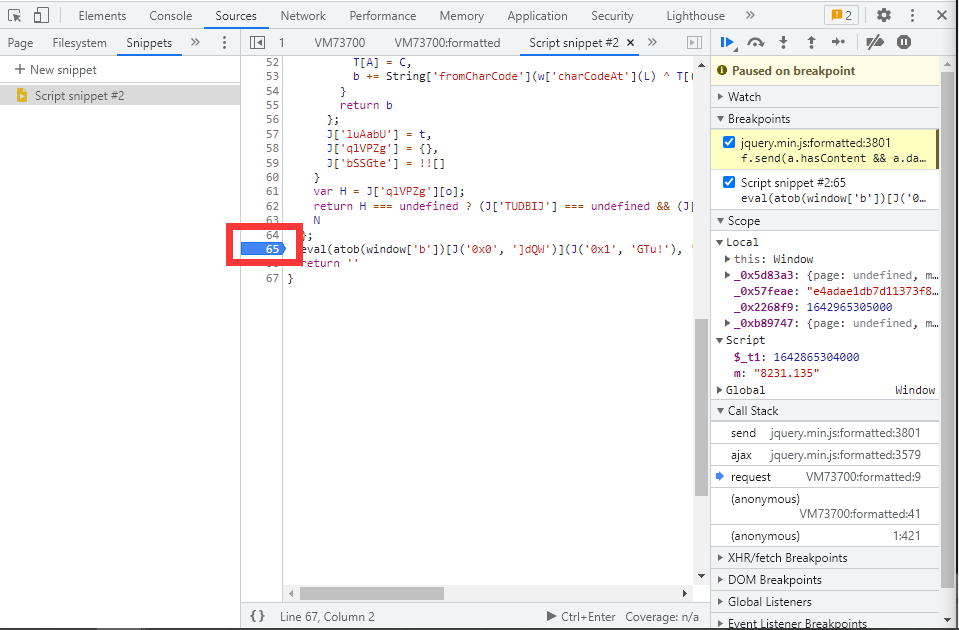
>在下面的console中测试参数,首先调用oo0o0函数随便传入字符串，然后测试参数
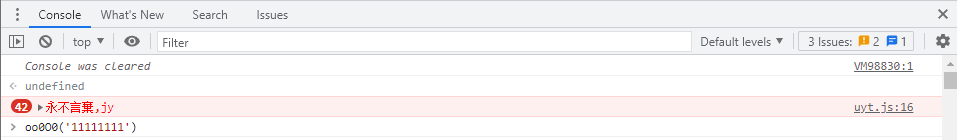
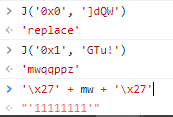
- 分析代码
> atob解密windo['b']，传递'replace'、'mwqqppz'和时间戳,结果赋值给f
> f的值组成m参数的前半部分，时间戳计算后生成后半部分

### 3.4构建js代码
```javascript
function get_m(){
    var time = Date.parse(new Date()) + 100000000 //模仿函数，加上+ 100000000
    var f = hex_md5(time) //模仿定义函数f
    var res = f + '丨' + time/1000 //模仿组合，然后返回参数m
    return res
}
```